# Import necessary libraries

In [1]:
import os
import pandas as pd
import librosa
import IPython.display as ipd
import time
import matplotlib.pyplot as plt

In [31]:
# pip install --upgrade numba

# Analysis 1: Audio with duration

In [2]:
# Set directory path and extension of audio files
directory_path = "/home/elias/clean_data-female/wav"
extension = ".wav"
min_duration = 1.0
# Create a list of file paths
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(extension)]

# Initialize empty lists for file metadata
filenames = []
durations = []

# Loop through the files and extract metadata
for file_path in file_paths:
    filename = os.path.basename(file_path)
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
    except:
        # If there is an error loading the file, set duration to -1
        duration = -1
    filenames.append(filename)
    durations.append(duration)

# Create a Pandas DataFrame with the metadata
df_aud_dur = pd.DataFrame({"filename": filenames, "duration": durations})

# Filter the DataFrame based on your criteria
broken_files = df_aud_dur[df_aud_dur["duration"] == -1]
distorted_files = df_aud_dur[(df_aud_dur["duration"] > 0) & (df_aud_dur["duration"] < min_duration)]
short_files = df_aud_dur[df_aud_dur["duration"] < min_duration]

df_aud_dur.head()


,filename,duration
0,e12d4214-a935-4979-a72b-5380c5dac1e1.wav,3.179979
1,c2f8db1e-02e1-4674-bd52-fa528f052890.wav,3.179979
2,83b49d64-30b9-4d78-8577-1616b33f9821.wav,2.909979
3,844ece9c-eced-468b-8356-436caeea7ec0.wav,5.610000
4,589e22a2-7570-451a-809f-3f9c791e84fd.wav,1.650000


The above columns show the audio and their duration

## Analysis 2: Audio less than 1 second

In [33]:
# Print the filenames of short files
for filename in short_files["filename"]:
    print(f"{filename} is less than {min_duration} seconds.")

ecdec68d-2bbd-4752-bc41-3b203b54fc59.wav is less than 1.0 seconds.
bab43b7e-5582-4999-aa2f-236fb083531f.wav is less than 1.0 seconds.
fa26189b-88d0-4aa8-9bc6-64b07feaf93f.wav is less than 1.0 seconds.
175a1bc6-91f7-43ad-862c-dc41774226f4.wav is less than 1.0 seconds.
473c0eeb-d853-44e5-9fea-8869087b3880.wav is less than 1.0 seconds.
a798f6cc-0141-4871-8e82-3ec1cbb4a46c.wav is less than 1.0 seconds.
5d1bda66-f635-426a-b798-a194d4e97bf1.wav is less than 1.0 seconds.
b4cd70fb-d365-44c4-9d4a-804e58adf808.wav is less than 1.0 seconds.
7b66b277-39c5-43a9-ab2a-bd4918828c59.wav is less than 1.0 seconds.
8cb4835b-e5ef-4cf9-8dad-aec825252e3b.wav is less than 1.0 seconds.
97a060a0-f0a3-47d9-9962-af39f7fded58.wav is less than 1.0 seconds.
45756af3-50b9-47cc-88b8-081c1418b32e.wav is less than 1.0 seconds.
6f5b74cc-dcfb-4388-b233-4a0fcfa829ab.wav is less than 1.0 seconds.
df52cc9d-09c9-48e2-897b-6668bc561e22.wav is less than 1.0 seconds.
69e800b9-9fcf-4ddb-b4d6-d9cc0af19715.wav is less than 1.0 seco

# Analysis 3: Listen the particular audio

In [34]:
wavs_list=['/home/elias/clean_data-female/wav/034ce35d-c04e-4866-90cf-4106f6bed7c6.wav', 
      '/home/elias/clean_data-female/wav/8512f9ea-2822-46e8-876d-d0d560c19115.wav']

for wav in wavs_list:
    ipd.display(ipd.Audio(wav, autoplay=True))
    time.sleep(5) # next autoplay starts in 5s

In [35]:
print(df_aud_dur[df_aud_dur["filename"] == "8512f9ea-2822-46e8-876d-d0d560c19115.wav"]["duration"])

9513    0.93
Name: duration, dtype: float64


In [36]:
# !pip install librosa==0.7.2

# Analysis 4: Waveform and spectogram analysis 

Text(0.5, 1.0, 'Spectrogram')

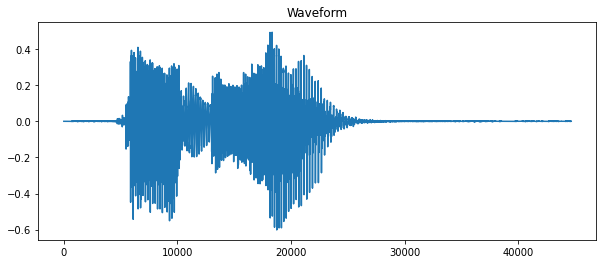

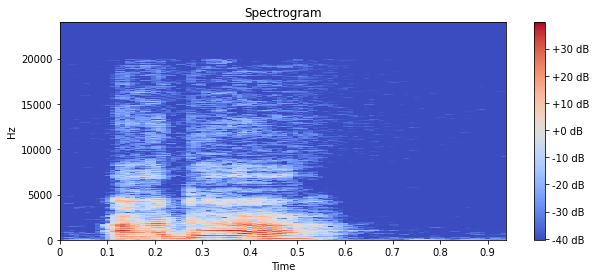

In [37]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load('/home/elias/clean_data-female/wav/8512f9ea-2822-46e8-876d-d0d560c19115.wav', sr=48000)

# Plot waveform
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Waveform')

# Plot spectrogram
spec = librosa.stft(y)
spec_db = librosa.amplitude_to_db(abs(spec))
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')


The above waveform and spectogram are based on the audio less than 1 second. 

# Analysis 5: Frame size wise silence detection

In [3]:
# Set directory path and extension of audio files
directory_path = "/home/elias/clean_data-female/wav"
extension = ".wav"
min_duration = 1.0

# Create a list of file paths
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(extension)]

# Initialize empty lists for file metadata
filenames = []
durations = []
silence_begin = []
silence_end = []

# Loop through the files and extract metadata
for file_path in file_paths:
    filename = os.path.basename(file_path)
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        
        # detect the non-silent intervals of the audio signal
        intervals = librosa.effects.split(y)
        # calculate the duration of the silence at the beginning and end of the audio
        if len(intervals) > 0:
            start_silence = intervals[0][0] / sr
            end_silence = (len(y) - intervals[-1][-1]) / sr
        else:
            start_silence = 0
            end_silence = 0
    except:
        # If there is an error loading the file, set duration and silence to -1
        duration = -1
        start_silence = -1
        end_silence = -1
        
    filenames.append(filename)
    durations.append(duration)
    silence_begin.append(start_silence)
    silence_end.append(end_silence)

# Create a Pandas DataFrame with the metadata
aud_frame_df = pd.DataFrame({"filename": filenames, "duration": durations, "silence_begin": silence_begin, "silence_end": silence_end})

# Filter the DataFrame based on your criteria
broken_files = aud_frame_df[aud_frame_df["duration"] == -1]
distorted_files = aud_frame_df[(aud_frame_df["duration"] > 0) & (aud_frame_df["duration"] < min_duration)]
short_files = aud_frame_df[aud_frame_df["duration"] < min_duration]
aud_frame_df.head()

,filename,duration,silence_begin,silence_end
0,e12d4214-a935-4979-a72b-5380c5dac1e1.wav,3.179979,0.000000,0.438646
1,c2f8db1e-02e1-4674-bd52-fa528f052890.wav,3.179979,0.000000,0.438646
2,83b49d64-30b9-4d78-8577-1616b33f9821.wav,2.909979,0.384000,0.381979
3,844ece9c-eced-468b-8356-436caeea7ec0.wav,5.610000,0.042667,0.447333
4,589e22a2-7570-451a-809f-3f9c791e84fd.wav,1.650000,0.341333,0.380667


Each audio has a column called 'Silence Being and Silence Ending' for an audio. For file number 0, we can see that the silence is 0.00 but the silence end is found to be 0.43, which indicates that the particular audio was silent for 0.43 milliseconds when the speaking stopped.

# Analysis 6 (a): Calculate total and actual silence unsorted

In [4]:
# Set directory path and extension of audio files
directory_path = "/home/elias/clean_data-female/wav"
extension = ".wav"
min_duration = 1.0

# Create a list of file paths
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(extension)]

# Initialize empty lists for file metadata
filenames = []
durations = []
total_silence = []
actual_speech = []

# Loop through the files and extract metadata
for file_path in file_paths:
    filename = os.path.basename(file_path)
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        # detect the non-silent intervals of the audio signal
        intervals = librosa.effects.split(y) 
        # calculate the duration of the silence at the beginning and end of the audio
        if len(intervals) > 0:
            start_silence = intervals[0][0] / sr
            end_silence = (len(y) - intervals[-1][-1]) / sr
        else:
            start_silence = 0
            end_silence = 0
        
        # calculate the total duration of silence in the audio
        total_silence_duration = 0
        for i in range(len(intervals)-1):
            gap_duration = (intervals[i+1][0] - intervals[i][-1]) / sr
            if gap_duration > 0.1: # consider gaps longer than 100ms as silence
                total_silence_duration += gap_duration
        
        # calculate the actual speech duration as a percentage of the total duration
        actual_speech_duration = (duration - total_silence_duration) 
        
        percentage = (actual_speech_duration / duration) * 100
        
    except:
        # If there is an error loading the file, set duration, silence, and actual speech to -1
        duration = -1
        start_silence = -1
        end_silence = -1
        total_silence_duration = -1
        actual_speech_duration = -1
        
    filenames.append(filename)
    durations.append(duration)
    total_silence.append(total_silence_duration)
    actual_speech.append(percentage)

# Create a Pandas DataFrame with the metadata
actual_speech_df = pd.DataFrame({"filename": filenames, "duration": durations, "total_silence": total_silence, "actual_speech": actual_speech})

# Filter the DataFrame based on your criteria
broken_files = actual_speech_df[actual_speech_df["duration"] == -1]
distorted_files = actual_speech_df[(actual_speech_df["duration"] > 0) & (actual_speech_df["duration"] < min_duration)]
short_files = actual_speech_df[actual_speech_df["duration"] < min_duration]

# Print the DataFrame with actual speech duration as a percentage
actual_speech_df["actual_speech"] = actual_speech_df["actual_speech"].round(2)
actual_speech_df.head(20)

,filename,duration,total_silence,actual_speech
0,e12d4214-a935-4979-a72b-5380c5dac1e1.wav,3.179979,0.000000,100.00
1,c2f8db1e-02e1-4674-bd52-fa528f052890.wav,3.179979,0.138667,95.64
2,83b49d64-30b9-4d78-8577-1616b33f9821.wav,2.909979,0.000000,100.00
3,844ece9c-eced-468b-8356-436caeea7ec0.wav,5.610000,0.704000,87.45
4,589e22a2-7570-451a-809f-3f9c791e84fd.wav,1.650000,0.000000,100.00
5,e5ab86a4-d9d9-4054-9081-40122afde7d0.wav,2.130000,0.000000,100.00
6,710aedda-a178-4e0c-9a61-54f75dd3369c.wav,2.250000,0.000000,100.00
7,bc2c8492-cab6-473a-97fe-c9d80a6add2d.wav,3.389979,0.000000,100.00
8,3462cb25-5502-4905-9a21-2bbfb8d3d027.wav,2.190000,0.000000,100.00
9,2c05d174-cd00-4da2-b477-b1f777f983c4.wav,1.410000,0.000000,100.00


librosa.get_duration: librosa.get_duration(y, sr) works by dividing the length of the audio signal y (in samples) by the sampling rate sr (in Hz). This gives the duration of the audio signal in seconds. For example, if y has length 48000 (which is the number of samples in one second of audio at a sampling rate of 48000 Hz), and sr is 48000, then librosa.get_duration(y, sr) will return 1.0 because the audio signal is one second long. If y has length 96000 and sr is 48000, then librosa.get_duration(y, sr) will return 2.0 because the audio signal is two seconds long.


In [40]:
sorted(actual_speech_df['actual_speech'])

[87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,
 87.85,


# Analysis 6: (b) Calculate total and actual silence sorted

In [5]:
import os
import librosa
import pandas as pd

# Set directory path and extension of audio files
directory_path = "/home/elias/clean_data-female/wav"
extension = ".wav"
min_duration = 1.0

# Create a list of file paths
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(extension)]

# Initialize empty lists for file metadata
filenames = []
durations = []
total_silence = []
actual_speech = []

# Loop through the files and extract metadata
for file_path in file_paths:
    filename = os.path.basename(file_path)
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        # detect the non-silent intervals of the audio signal
        intervals = librosa.effects.split(y) 
        # calculate the duration of the silence at the beginning and end of the audio
        if len(intervals) > 0:
            start_silence = intervals[0][0] / sr
            end_silence = (len(y) - intervals[-1][-1]) / sr
        else:
            start_silence = 0
            end_silence = 0
        
        # calculate the total duration of silence in the audio
        total_silence_duration = 0
        for i in range(len(intervals)-1):
            gap_duration = (intervals[i+1][0] - intervals[i][-1]) / sr
            if gap_duration > 0.1: # consider gaps longer than 100ms as silence
                total_silence_duration += gap_duration
        
        # calculate the actual speech duration as a percentage of the total duration
        actual_speech_duration = (duration - total_silence_duration) 
        
        percentage = (actual_speech_duration / duration) * 100
        
    except:
        # If there is an error loading the file, set duration, silence, and actual speech to -1
        duration = -1
        start_silence = -1
        end_silence = -1
        total_silence_duration = -1
        actual_speech_duration = -1
        
    filenames.append(filename)
    durations.append(duration)
    total_silence.append(total_silence_duration)
    actual_speech.append(percentage)

# Create a Pandas DataFrame with the metadata
actual_speech_df = pd.DataFrame({"filename": filenames, "duration": durations, "total_silence": total_silence, "actual_speech": actual_speech})

# Sort the DataFrame by actual_speech in descending order
actual_speech_df = actual_speech_df.sort_values(by='actual_speech', ascending=False)

# Filter the DataFrame based on your criteria
broken_files = actual_speech_df[actual_speech_df["duration"] == -1]
distorted_files = actual_speech_df[(actual_speech_df["duration"] > 0) & (actual_speech_df["duration"] < min_duration)]
short_files = actual_speech_df[actual_speech_df["duration"] < min_duration]

# Print the DataFrame with actual speech duration as a percentage
actual_speech_df["actual_speech"] = actual_speech_df["actual_speech"].round(2)
print(actual_speech_df.head(20))


                                      filename  duration  total_silence  \
0     e12d4214-a935-4979-a72b-5380c5dac1e1.wav  3.179979            0.0   
5637  2d4bee04-43d7-4db2-abf0-90a5f5ff1d84.wav  2.969979            0.0   
5653  cfcaa49b-ad97-409b-b712-eeca1cff2bbe.wav  3.239979            0.0   
5652  a1cca968-8fd1-4331-ab1b-c606bbf4b051.wav  2.130000            0.0   
5651  2f73db74-a8f6-47c0-9ebe-78e62c6b384f.wav  1.710000            0.0   
5650  0648a391-7df9-4d4e-9772-3b6bf0b47d82.wav  3.209979            0.0   
5648  a9f06d33-e36d-4087-a8c9-e12f88b93928.wav  1.950000            0.0   
5646  ea959415-e63d-4e81-9812-a79f8e026d67.wav  2.639979            0.0   
5644  64e4ea03-0e07-4f6e-afdc-ca061ed649cd.wav  2.309979            0.0   
5643  6cde8b45-a5f1-4dd2-ba53-0a1cb94bcf4e.wav  1.170000            0.0   
9249  fdad5c46-4e34-4ef9-82d8-530fb24a392b.wav  2.489979            0.0   
5641  ec508772-7623-46de-a614-e43e75269c2c.wav  2.190000            0.0   
5640  961dc84e-14b9-469d-

In [6]:
actual_speech_df.tail(20)

,filename,duration,total_silence,actual_speech
2989,746a9a74-bd51-4055-a75b-69972fad902d.wav,2.250000,0.672000,70.13
7794,e37ed3ab-2fd1-4654-9550-dab6f82c0673.wav,2.909979,0.874667,69.94
8123,c47d882c-2099-48ab-a754-d1256c55b169.wav,2.729979,0.821333,69.91
2912,e9f91af6-1c77-4764-976c-62fc2b70a298.wav,1.230000,0.373333,69.65
530,a7844caf-af28-4664-a604-da963798ea3a.wav,1.440000,0.437333,69.63
2954,61c34455-00ae-482c-bed5-a6ef9006fa15.wav,1.050000,0.320000,69.52
8820,c6a77079-d650-4ec0-98f4-d8968cd5da06.wav,1.410000,0.448000,68.23
8889,3e9b5bdb-032e-490e-8339-e474c51e6291.wav,1.860000,0.597333,67.89
9439,949a819a-1462-41e5-a718-e215673cad9f.wav,1.530000,0.512000,66.54
9828,653ec7b3-cdde-4b5f-8615-7c7c78d0e8b6.wav,2.339979,0.789333,66.27


# Data Distribution

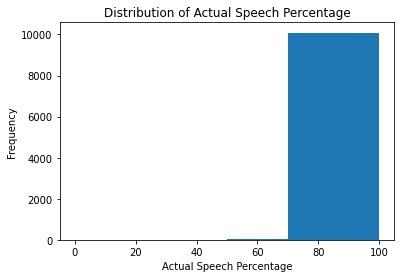

In [7]:
import matplotlib.pyplot as plt

# Get the actual speech percentage values
actual_speech_percentages = actual_speech_df["actual_speech"]

# Set the bins and range for the histogram plot
bins = [0, 10, 20, 50, 70, 100]
range = (0, 100)

# Create the histogram plot
plt.hist(actual_speech_percentages, bins=bins, range=range)

# Set the plot title and labels
plt.title("Distribution of Actual Speech Percentage")
plt.xlabel("Actual Speech Percentage")
plt.ylabel("Frequency")

# Show the plot
plt.show()


This histogram plot with the x-axis showing the actual speech percentage intervals and the y-axis showing the frequency of audio files in each interval.

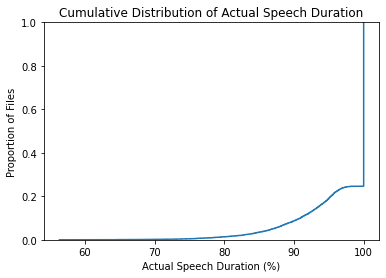

In [8]:
import seaborn as sns

# Create a cumulative distribution plot using seaborn
sns.ecdfplot(actual_speech_df["actual_speech"], stat="proportion")

# Add labels and title
plt.xlabel("Actual Speech Duration (%)")
plt.ylabel("Proportion of Files")
plt.title("Cumulative Distribution of Actual Speech Duration")

# Show the plot
plt.show()


This cumulative distribution plot that shows the proportion of files that have an actual speech duration less than or equal to a certain percentage. The x-axis represents the actual speech duration as a percentage, and the y-axis represents the proportion of files. The plot shows a step function that increases as we move from left to right, indicating the cumulative distribution of actual speech duration.

Note that we are using the stat="proportion" parameter to create a cumulative distribution plot instead of an empirical cumulative distribution plot. This means that the y-axis will show the proportion of files rather than the actual cumulative proportion.

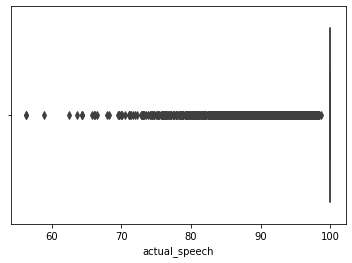

In [9]:
# create boxplot
sns.boxplot(data=actual_speech_df, x='actual_speech')

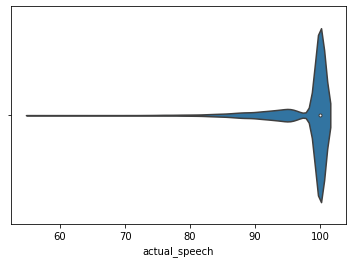

In [10]:
# create violinplot
sns.violinplot(data=actual_speech_df, x='actual_speech')


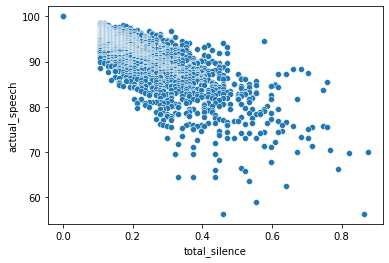

In [11]:
# create scatter plot
sns.scatterplot(data=actual_speech_df, x='total_silence', y='actual_speech')


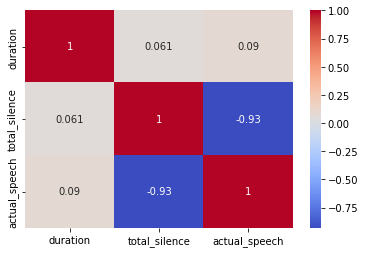

In [12]:
# select numeric columns
numeric_cols = ['duration', 'total_silence', 'actual_speech']

# create correlation matrix
corr_matrix = actual_speech_df[numeric_cols].corr()

# create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Analysis 7: Check the potential issues

In [49]:
# Set directory path and extension of audio files
directory_path = "/home/elias/clean_data-female/wav"
extension = ".wav"
min_duration = 1.0
min_silence = 0.5

# Create a list of file paths
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(extension)]

# Initialize empty lists for file metadata
filenames = []
durations = []
silence_begin = []
silence_end = []
silence_total = []

# Loop through the files and extract metadata
for file_path in file_paths:
    filename = os.path.basename(file_path)
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        
        # detect the non-silent intervals of the audio signal
        intervals = librosa.effects.split(y)
        # calculate the duration of the silence at the beginning and end of the audio
        if len(intervals) > 0:
            start_silence = intervals[0][0] / sr
            end_silence = (len(y) - intervals[-1][-1]) / sr
            total_silence = sum([(i[1]-i[0])/sr for i in intervals])
        else:
            start_silence = 0
            end_silence = 0
            total_silence = 0
    except:
        # If there is an error loading the file, set duration and silence to -1
        duration = -1
        start_silence = -1
        end_silence = -1
        total_silence = -1
        
    filenames.append(filename)
    durations.append(duration)
    silence_begin.append(start_silence)
    silence_end.append(end_silence)
    silence_total.append(total_silence)

# Create a Pandas DataFrame with the metadata
df = pd.DataFrame({"filename": filenames, "duration": durations, "silence_begin": silence_begin, "silence_end": silence_end, "silence_total": silence_total})

# Filter the DataFrame based on your criteria
broken_files = df[df["duration"] == -1]
distorted_files = df[(df["duration"] > 0) & (df["duration"] < min_duration)]
short_files = df[df["duration"] < min_duration]
silent_files = df[df["silence_total"] >= min_silence]

# Check for any potential issues
if len(broken_files) > 0:
    print(f"{len(broken_files)} file(s) could not be loaded.")
if len(distorted_files) > 0:
    print(f"{len(distorted_files)} file(s) have a duration less than {min_duration} seconds.")
if len(short_files) > 0:
    print(f"{len(short_files)} file(s) have a duration less than {min_duration} seconds.")
if len(silent_files) > 0:
    print(f"{len(silent_files)} file(s) have more than {min_silence} seconds of total silence.")


70 file(s) have a duration less than 1.0 seconds.
70 file(s) have a duration less than 1.0 seconds.
10056 file(s) have more than 0.5 seconds of total silence.


# Analysis 8: More in-depth analysis

Potential problematic files:
                                       filename  duration  silence_begin  \
0      e12d4214-a935-4979-a72b-5380c5dac1e1.wav  3.179979       0.000000   
1      c2f8db1e-02e1-4674-bd52-fa528f052890.wav  3.179979       0.000000   
2      83b49d64-30b9-4d78-8577-1616b33f9821.wav  2.909979       0.384000   
3      844ece9c-eced-468b-8356-436caeea7ec0.wav  5.610000       0.042667   
4      589e22a2-7570-451a-809f-3f9c791e84fd.wav  1.650000       0.341333   
...                                         ...       ...            ...   
10099  bdcae79f-9a67-48bf-9fb5-7aeb1a802528.wav  2.190000       0.000000   
10100  5f576e63-7807-498c-8266-bcfe9053c9ea.wav  2.789979       0.202667   
10101  28878daa-061b-4fc5-8d62-910baa062826.wav  2.010000       0.256000   
10102  ad45bf99-d809-407d-befb-1b5b8736e76d.wav  3.269979       0.000000   
10103  a29a7d2b-a5aa-48ad-a01f-8b7e7fb9bbad.wav  2.369979       0.106667   

       silence_end  silence_total  
0         0.438646    

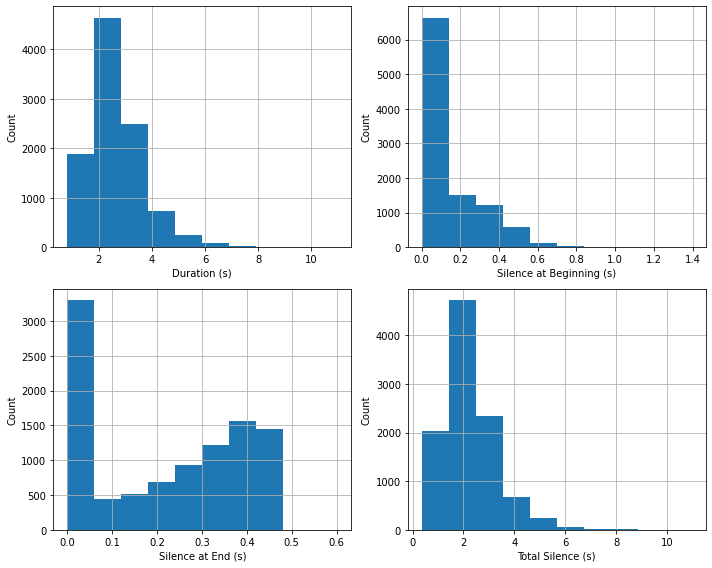

In [50]:
# Compute statistics for duration and silence
duration_stats = df["duration"].describe()
begin_silence_stats = df["silence_begin"].describe()
end_silence_stats = df["silence_end"].describe()

# Plot histograms of duration and silence
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
df["duration"].hist(ax=axes[0, 0])
df["silence_begin"].hist(ax=axes[0, 1])
df["silence_end"].hist(ax=axes[1, 0])
df["silence_total"].hist(ax=axes[1, 1])
axes[0, 0].set_xlabel("Duration (s)")
axes[0, 1].set_xlabel("Silence at Beginning (s)")
axes[1, 0].set_xlabel("Silence at End (s)")
axes[1, 1].set_xlabel("Total Silence (s)")
axes[0, 0].set_ylabel("Count")
axes[0, 1].set_ylabel("Count")
axes[1, 0].set_ylabel("Count")
axes[1, 1].set_ylabel("Count")
fig.tight_layout()

# Plot boxplots of duration and silence
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# df.boxplot(column=["duration"], ax=axes[0])
# df[["silence_begin", "silence_end", "silence_total"]].boxplot(ax=axes[1:], showfliers=False)
# axes[0].set_ylabel("Duration (s)")
# axes[1].set_ylabel("Silence (s)")
# axes[2].set_ylabel("Silence (s)")
# fig.tight_layout()

# Identify potential problematic files based on the metadata
problematic_files = df[(df["duration"] < duration_stats["25%"]) | 
                       (df["silence_begin"] > begin_silence_stats["75%"]) | 
                       (df["silence_end"] > end_silence_stats["75%"]) |
                       (df["silence_total"] > df["duration"] * 0.5)]
print("Potential problematic files:")
print(problematic_files)


I have computed some basic statistics (e.g., mean, median, min, max, quartiles) for the duration and amount of silence at the beginning, end, and total of each audio file. It then plots histograms and boxplots of these metadata to visualize their distribution and outliers.

# Analysis 9: Finding outliers data point

To ferret out the outliers lurking within our dataset, we'll hone in on the actual speech percentage. Should the speech percentages fall outside the boundaries we've set, it'll be cast aside as an outlier. Think of it like detecting a black sheep in a flock - we're scanning for the exceptional cases that don't fit the norm.

In [13]:
actual_speech_df.head(10)

,filename,duration,total_silence,actual_speech
0,e12d4214-a935-4979-a72b-5380c5dac1e1.wav,3.179979,0.0,100.0
5637,2d4bee04-43d7-4db2-abf0-90a5f5ff1d84.wav,2.969979,0.0,100.0
5653,cfcaa49b-ad97-409b-b712-eeca1cff2bbe.wav,3.239979,0.0,100.0
5652,a1cca968-8fd1-4331-ab1b-c606bbf4b051.wav,2.130000,0.0,100.0
5651,2f73db74-a8f6-47c0-9ebe-78e62c6b384f.wav,1.710000,0.0,100.0
5650,0648a391-7df9-4d4e-9772-3b6bf0b47d82.wav,3.209979,0.0,100.0
5648,a9f06d33-e36d-4087-a8c9-e12f88b93928.wav,1.950000,0.0,100.0
5646,ea959415-e63d-4e81-9812-a79f8e026d67.wav,2.639979,0.0,100.0
5644,64e4ea03-0e07-4f6e-afdc-ca061ed649cd.wav,2.309979,0.0,100.0
5643,6cde8b45-a5f1-4dd2-ba53-0a1cb94bcf4e.wav,1.170000,0.0,100.0


Set 0.04 for the first quartile, instead of 25%

In [26]:
Q1 = actual_speech_df['actual_speech'].quantile(0.04)
Q3 = actual_speech_df['actual_speech'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
outliers = actual_speech_df[(actual_speech_df['actual_speech'] < lower_bound) | (actual_speech_df['actual_speech'] > upper_bound)]
outliers

,filename,duration,total_silence,actual_speech
104,3b52d7ce-d36e-4225-b110-0583bcd1d5f3.wav,1.05,0.373333,64.44
5670,54f062f3-4428-4284-a6f2-824ebada13e0.wav,1.23,0.437333,64.44
1511,6f5b74cc-dcfb-4388-b233-4a0fcfa829ab.wav,0.93,0.330667,64.44
30,6c6f2fe9-b462-477b-bb17-a6021845b2b4.wav,1.47,0.533333,63.72
3615,f6b48c18-bcc1-40ef-9f85-c9327f2d01b8.wav,1.71,0.640000,62.57
2673,c48bb2f3-ca13-4b72-a5d5-fdc309064a2e.wav,1.35,0.554667,58.91
5642,57be7738-eebd-4717-b885-1b16198478e6.wav,1.98,0.864000,56.36
417,c2eaa231-2a4b-4ff2-a6e9-fefabc83416b.wav,1.05,0.458667,56.32


In [28]:
len(outliers)

8

When working with a dataset, it's important to identify any outliers that might be lurking within it. These outliers can throw off our analysis, leading to skewed results and false conclusions. One way to detect outliers is to focus on the actual speech percentage.

By setting boundaries for the acceptable range of speech percentages, we can identify any data points that fall outside of that range. These outlying data points, known as outliers, can then be flagged and removed from our analysis, allowing us to more accurately interpret the remaining data.

To better understand this concept, think of it like scanning a flock of sheep for a black sheep. The black sheep stands out from the rest of the flock, just as outliers stand out from the rest of the data. By pinpointing these exceptional cases that don't fit the norm, we can better understand the trends and patterns in our dataset.

When analyzing a dataset, it's important to adjust our outlier detection methods based on the size and distribution of the data. For example, let's say we have a dataset with a range of percentages, including some very small values like 0.004. If we set narrow boundaries for outlier detection, we may end up with a large number of outliers - perhaps even 8 in this case.

However, when we adjust our approach to account for the size and distribution of the data, we may find that the number of outliers decreases dramatically. For instance, if we set a 25% threshold in the first quartile of the data, we may find that there are no outliers at all, since the data is not as large and the threshold is more lenient.

By adapting our outlier detection methods to fit the specific characteristics of our dataset, we can ensure that our analysis is accurate, relevant, and reliable.

# Elias Hossain
## North South University
### Department of Electrical and Computer Engineering
